## Prophet Baseline Notebook

This notebook contains the code used to predict the price of bitcoin **just** using FB prophet.

You can think of this as a sort of baseline model!

In [1]:
from fbprophet import Prophet
from sklearn.metrics import r2_score
%run helper_functions.py
%autosave 120
%matplotlib inline
%run prophet_helper.py
%run prophet_baseline_btc.py
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['legend.fontsize'] = 20
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', -1)
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Autosaving every 120 seconds


## Forecasting BTC Price with Fb Prophet

In [2]:
df = unpickle_object("blockchain_info_df.pkl")
df.head()

,gold_price,eth_price,pos_sent,neg_sent,tot_num_trans,unique_addr,hash_rate,mempool_trans,USD_trans_val,mkt_price
date,,,,,,,,,,
2016-10-26,1273.9,11.455,0.143706,0.066297,225924.0,431781.0,1.752433e+06,69811.000000,1.768021e+08,672.221413
2016-10-27,1269.3,11.515,0.127429,0.064310,326388.0,457806.0,2.042404e+06,171358.250000,2.832341e+08,682.223962
2016-10-28,1265.9,11.280,0.128794,0.056393,250876.0,434269.0,1.916330e+06,131888.333333,1.946002e+08,687.688337
2016-10-29,1265.9,10.770,0.139114,0.063177,229689.0,416457.0,1.878507e+06,17765.750000,1.674801e+08,714.895450
2016-10-30,1265.9,10.805,0.131922,0.064369,209337.0,360327.0,2.130656e+06,20822.250000,1.797445e+08,698.003400


In [3]:
df_btc = pd.DataFrame(df['mkt_price'])

In [4]:
true, pred = prophet_baseline_BTC(df_btc, 30, "mkt_price")

Running model from 2016-10-26 to 2017-01-23 and predicting on 2017-01-24

True value of mkt_price on 2017-01-24 is 890.320225
The predicted value for mkt_price on 2017-01-24 is 894.3099830812673

Running model from 2016-10-27 to 2017-01-24 and predicting on 2017-01-25

True value of mkt_price on 2017-01-25 is 893.045625
The predicted value for mkt_price on 2017-01-25 is 892.3820039963203

Running model from 2016-10-28 to 2017-01-25 and predicting on 2017-01-26

True value of mkt_price on 2017-01-26 is 915.95625
The predicted value for mkt_price on 2017-01-26 is 886.5515155298705

Running model from 2016-10-29 to 2017-01-26 and predicting on 2017-01-27

True value of mkt_price on 2017-01-27 is 919.27975
The predicted value for mkt_price on 2017-01-27 is 884.3053284251986

Running model from 2016-10-30 to 2017-01-27 and predicting on 2017-01-28

True value of mkt_price on 2017-01-28 is 920.31225
The predicted value for mkt_price on 2017-01-28 is 897.3012525460083

Running model from 2016

In [5]:
r2_score(true, pred) #we see that our baseline model just predicts 44% of the variation when predicting price

0.44573985972451446

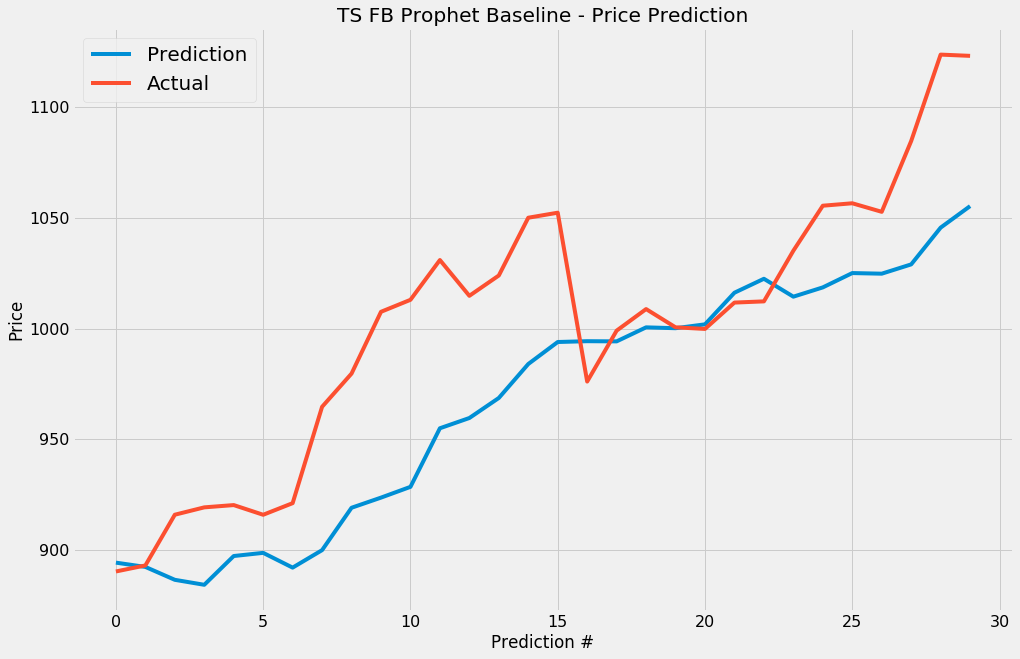

In [6]:
plt.plot(pred)
plt.plot(true)
plt.legend(["Prediction", 'Actual'], loc='upper left')
plt.xlabel("Prediction #")
plt.ylabel("Price")
plt.title("TS FB Prophet Baseline - Price Prediction");

## Let's predict percentage change!

In [7]:
df_btc_pct = df_btc.pct_change()
df_btc_pct.rename(columns={"mkt_price": "percent_change"}, inplace=True)
df_btc_pct = df_btc_pct.iloc[1:, :]
print(df_btc_pct.shape)
df_btc_pct.head()


(119, 1)


,percent_change
date,
2016-10-27,0.014880
2016-10-28,0.008010
2016-10-29,0.039563
2016-10-30,-0.023629
2016-10-31,0.005728


In [8]:
true_pct, pred_pct = prophet_baseline_BTC(df_btc_pct, 30, "percent_change")

Running model from 2016-10-27 to 2017-01-23 and predicting on 2017-01-24

True value of percent_change on 2017-01-24 is -0.03443693330937814
The predicted value for percent_change on 2017-01-24 is 0.014545719346050198

Running model from 2016-10-28 to 2017-01-24 and predicting on 2017-01-25

True value of percent_change on 2017-01-25 is 0.0030611457804408104
The predicted value for percent_change on 2017-01-25 is 0.005000287356037803

Running model from 2016-10-29 to 2017-01-25 and predicting on 2017-01-26

True value of percent_change on 2017-01-26 is 0.025654484338356154
The predicted value for percent_change on 2017-01-26 is -0.009211191450551935

Running model from 2016-10-30 to 2017-01-26 and predicting on 2017-01-27

True value of percent_change on 2017-01-27 is 0.0036284484111550608
The predicted value for percent_change on 2017-01-27 is 0.010857611700461803

Running model from 2016-10-31 to 2017-01-27 and predicting on 2017-01-28

True value of percent_change on 2017-01-28 is 0

In [9]:
r2_score(true_pct, pred_pct)

-0.020629111221503127

MSE IS 0.000488913299898903

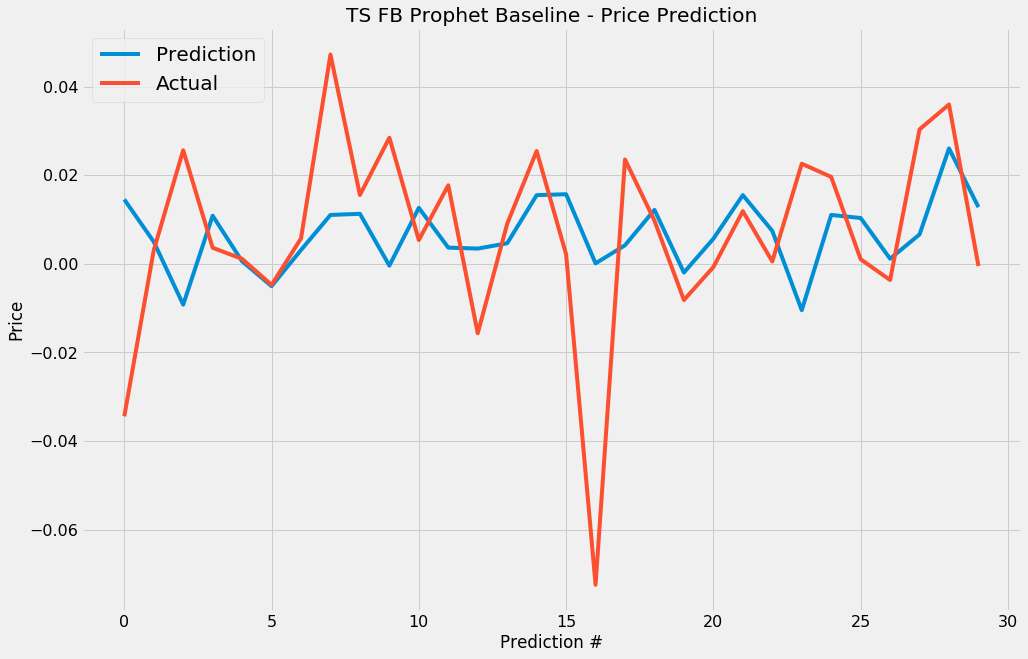

In [10]:
plt.plot(pred_pct)
plt.plot(true_pct)
plt.legend(["Prediction", 'Actual'], loc='upper left')
plt.xlabel("Prediction #")
plt.ylabel("Price")
plt.title("TS FB Prophet Baseline - Price Prediction");

we do terribly at predicting percent change! However, we know that percent change should be applied to the price of the previous day. Let's do that!

Note that the MSE is very close to 0 - we have quite an accurate Model!

In [11]:
prices_to_be_multiplied = df.loc[pd.date_range(start="2017-01-23", end="2017-02-21"), "mkt_price"]

In [12]:
forecast_price_lst = []
for index, price in enumerate(prices_to_be_multiplied):
    predicted_percent_change = 1+float(pred_pct[index])
    forecasted_price = (predicted_percent_change)*price
    forecast_price_lst.append(forecasted_price)

In [13]:
ground_truth_prices = df.loc[pd.date_range(start="2017-01-24", end="2017-02-22"), "mkt_price"]
ground_truth_prices = list(ground_truth_prices)

In [14]:
r2_score(ground_truth_prices, forecast_price_lst) # such an incredible result! This is what we have to beat with my nested TS model

0.87247841566280471

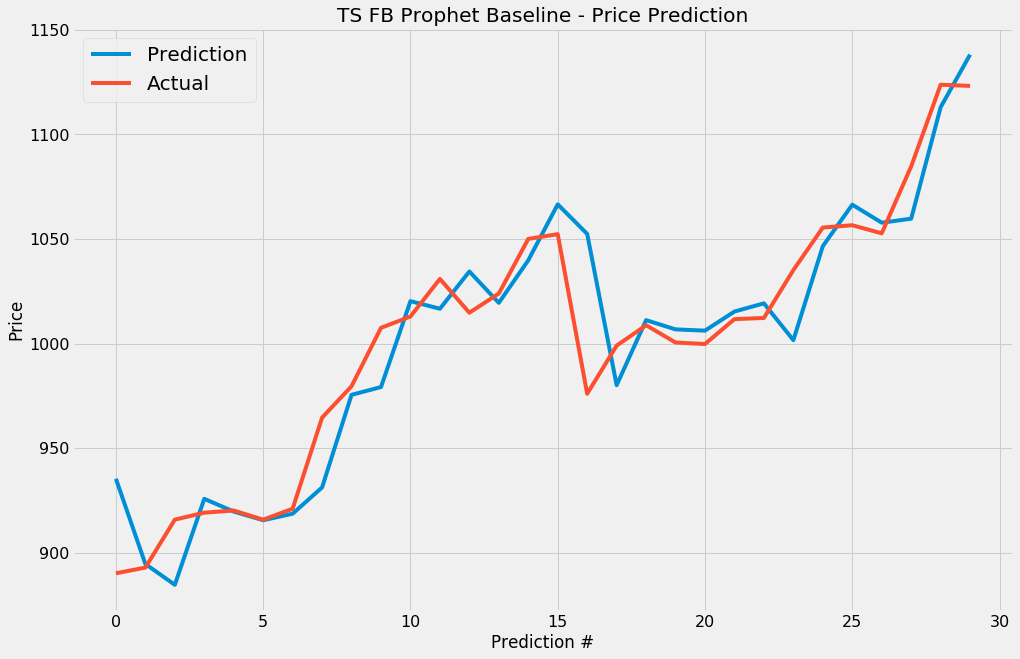

In [15]:
plt.plot(forecast_price_lst)
plt.plot(ground_truth_prices)
plt.legend(["Prediction", 'Actual'], loc='upper left')
plt.xlabel("Prediction #")
plt.ylabel("Price")
plt.title("TS FB Prophet Baseline - Price Prediction");